# **Business Case - Olist**

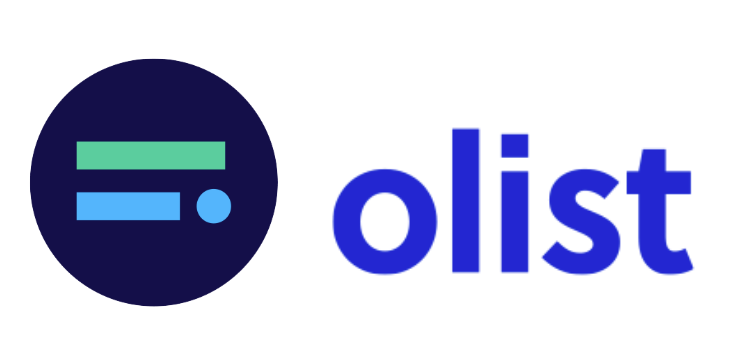

- Olist est implanté et n’opère qu’au Brésil.

- C’est une entreprise 100% numérique. En effet, les opérations commerciales sont entièrement gérées en ligne).

- Service e-commerce pour les vendeurs.

- Connecte les (petits) commerçants aux places de marché les plus importantes du Brésil (Amazon, Bahia, Walmart, ...).

- Offre des services de logistique et de gestion des stocks aux vendeurs.

- Ne vend rien directement aux consommateurs.




## **Votre mission**

Objectif :
Aider les chefs d'entreprise dans leur processus de prise de décision.


Le PDG d'Olist, vous a chargé de donner un sens à l'ensemble des données afin de formuler des recommandations sur la question suivante :

**Comment accroître la satisfaction des clients d’Olist ?**

## **La data**

Informations sur environ 100 000 commandes effectuées entre 2016 et 2018.
Des données réelles !
Les informations identifiables ont été anonymisées.
Documentation complète disponible dans le dictionnaire mis à disposition.

**Le vendeur** rejoint Olist et met en ligne à disposition d’Olist ses catalogues de produits.
Olist affiche ces catalogues sur les plateformes commerciales existantes (Amazon, Bahia, Walmart, ...).
Le vendeur reçoit une notification dès qu'un produit est vendu.
Le vendeur transmet les articles commandés à des transporteurs logistiques tiers.

**Attention : Plusieurs vendeurs peuvent être impliqués dans la commande d'un client !**


**Le client** parcourt les produits sur  les plateformes commerciales (Amazon, Bahia, Walmart, ...).
Il achète les produits listés via Olist.store.
Il obtient une date prévue pour la livraison, en tenant compte de l’estimation de l'heure d'arrivée.
Le client reçoit la/les commande(s) et laisse un commentaire.

Remarque : entre 2016 et mi-2018, un avis pouvait être laissé dès l'envoi de la commande, ce qui signifie qu'un client pouvait potentiellement laisser un avis pour un produit qu'il n'avait pas encore reçu !





# **1) LES DONNEES**

In [1]:
import pandas as pd
import zipfile
import io
import requests

# import orders_customers_dataset
customers_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/orders_customers_dataset.csv").drop(columns = "Unnamed: 0")

# import geolocation_dataset
response = requests.get("https://github.com/WildCodeSchool/wilddata/raw/main/geolocation_dataset.zip")
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall()
geolocation_df = pd.read_csv("geolocation_dataset.csv").drop(columns = "Unnamed: 0")

# import order_items_dataset
items_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/order_items_dataset.csv").drop(columns = "Unnamed: 0")

# import order_payments_dataset
payments_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/order_payments_dataset.csv").drop(columns = "Unnamed: 0")

# import order_reviews_dataset
reviews_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/order_reviews_dataset.csv").drop(columns = "Unnamed: 0")

# import orders_dataset
order_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/orders_dataset.csv").drop(columns = "Unnamed: 0")

# import products_dataset
products_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/products_dataset.csv").drop(columns = "Unnamed: 0")

# import sellers_dataset
sellers_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/sellers_dataset.csv").drop(columns = "Unnamed: 0")

## **1.1) Documentation :**

Voici le schéma de la base de données:



---

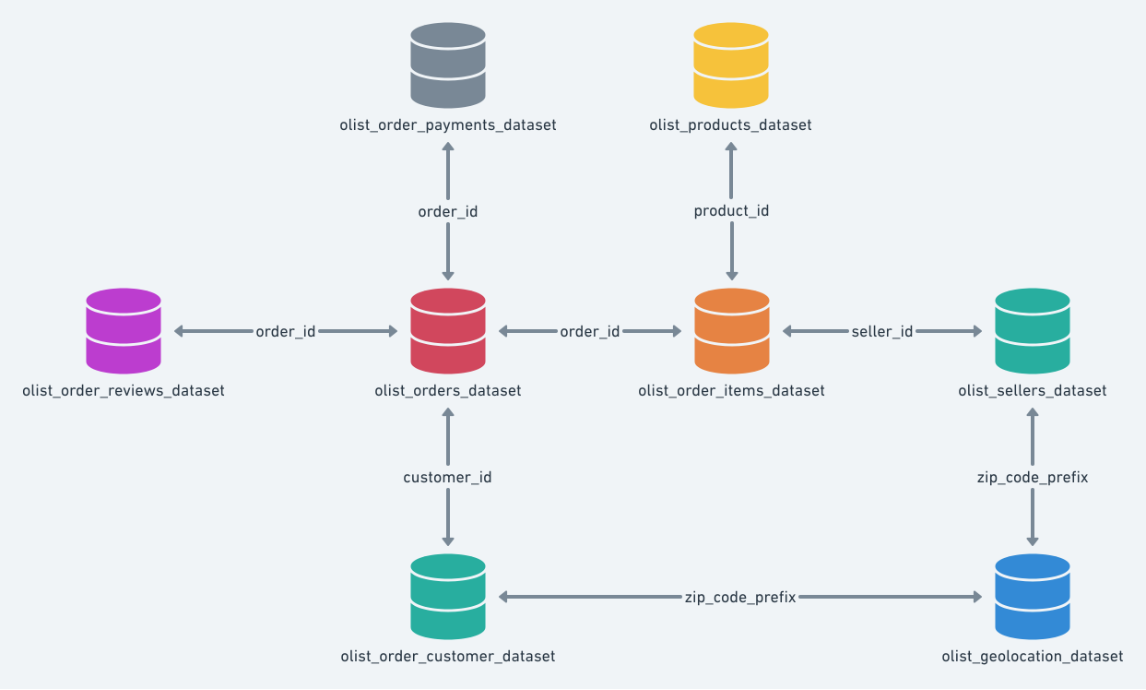

## **1.2) Dictionnaire des données**

- ### **`customers_dataset`**
    Cette table contient des informations sur le client et sa localisation. Utilise-le pour identifier les clients uniques dans le jeu de données des commandes et pour trouver le lieu de livraison des commandes.
    - `customer_id` : clé de l'ensemble de données des commandes. Chaque commande a un customer_id unique.  
    - `customer_unique_id` : identifiant unique d'un client.
    - `customer_zip_code_prefix` : cinq premiers chiffres du code postal du client.  
    - `customer_city` : nom de la ville du client.
    - `customer_state` : État du client.


- ### **`geolocation_dataset`**
    Ce jeu de données contient des informations sur les codes postaux brésiliens et les coordonnées lat/lng.  
    Utilise-le pour tracer des cartes et trouver les distances entre les vendeurs et les clients.

    - `geolocation_zip_code_prefix` : 5 premiers chiffres du code postal.   
    - `geolocation_lat` : latitude.   
    - `geolocation_lng` : longitude.  
    - `geolocation_city` : nom de la ville.  
    - `geolocation_state` : état


- ### **`items_dataset`**
    Ce jeu de données comprend des données sur les articles achetés dans le cadre de chaque commande.  
    Si 3 articles sont achetés dans une commande, le jeu de données affichera une ligne par article.  
    Si le même produit est acheté deux fois, 2 lignes seront affichées.

    - `order_id` : identifiant unique de la commande.  
    - `order_item_id` : numéro séquentiel identifiant le nombre d'articles inclus dans la même commande.   
    - `product_id` : identifiant unique du produit.  
    - `seller_id` : identifiant unique du vendeur.   
    - `shipping_limit_date` : indique la date limite d'expédition du vendeur pour le transfert de la commande au partenaire logistique.   
    - `price` : prix de l'article.  
    - `freight_value` : valeur du fret de l'article (si une commande comporte plus d'un article, la valeur du fret est répartie entre les articles).   


- ### **`payments_dataset`**  
    Ce jeu de données comprend des données sur les options de paiement des commandes.

    - `order_id` : identifiant unique d'une commande.  
    - `payment_sequential` : un client peut payer une commande avec plus d'un mode de paiement. Si c'est le cas, une séquence sera créée pour accueillir tous les paiements.   
    - `payment_type` : mode de paiement choisi par le client.   
    - `payment_installments` : nombre de versements choisis par le client.   
    - `payment_value` : valeur de la transaction.   


- ### **`reviews_dataset`**
    Cet ensemble de données comprend des données sur les évaluations faites par un client.  
    Après qu'un client ait acheté un produit dans la boutique Olist, un vendeur est informé de la nécessité d'exécuter cette commande.  
    Une fois que le client a reçu le produit, ou que la date de livraison estimée est arrivée, le client reçoit une enquête de satisfaction par e-mail où il peut laisser une note sur son expérience d'achat et écrire quelques commentaires.

    - `review_id` : identifiant unique de l'avis.  
    - `order_id` : identifiant unique de la commande.   
    - `review_score` : note allant de 1 à 5 donnée par le client dans une enquête de satisfaction.   
    - `review_comment_title` : titre du commentaire laissé par le client, en portugais.  
    - `review_comment_message` : message de l'avis laissé par le client, en portugais.   
    - `review_creation_date` : indique la date à laquelle l'enquête de satisfaction a été envoyée au client.  
    - `review_answer_timestamp` : indique l'horodatage de la réponse à l'enquête de satisfaction.  

- ### **`orders_dataset`**
  Il s'agit de l'ensemble de données principal. Pour chaque commande, vous pouvez trouver toutes les autres informations.

    - `order_id` : identifiant unique de la commande.  
    - `customer_id` : clé de l'ensemble de données sur les clients. Chaque commande a un numéro de client unique.  
    - `order_status` : référence au statut de la commande (livrée, expédiée, etc.).  
    - `order_purchase_timestamp` : indique l'horodatage de l'achat.  
    - `order_approved_at` : indique l'horodatage de l'approbation du paiement.  
    - `order_delivered_carrier_date` : indique l'horodatage de la commande, c'est-à-dire la date à laquelle elle a été remise au partenaire logistique.  
    - `order_delivered_customer_date` : indique la date réelle de livraison de la commande au client.  
    - `order_estimated_delivery_date` : indique la date de livraison estimée qui a été communiquée au client au moment de l'achat.  

- ### **`products_dataset`**
    Ce jeu de données comprend des données sur les produits vendus par Olist.

    - `product_id` : identifiant unique du produit.  
    - `product_category_name` : catégorie racine du produit, en portugais.   
    - `product_name_length` : nombre de caractères extraits du nom du produit.  
    - `product_description_length` : nombre de caractères extraits de la description du produit.  
    - `product_photos_qty` : nombre de photos publiées du produit.  
    - `product_weight_g` : poids du produit mesuré en grammes.  
    - `product_length_cm` : longueur du produit mesurée en centimètres.  
    - `product_height_cm` : hauteur du produit mesurée en centimètres.  
    - `product_width_cm` : largeur du produit mesurée en centimètres.   


- ### **`sellers_dataset`**
    Ce jeu de données comprend des données sur les vendeurs qui ont exécuté les commandes passées sur Olist.  
    Utilisez-le pour trouver l'emplacement du vendeur et pour identifier le vendeur qui a exécuté chaque produit.

    - `seller_id` : identifiant unique du vendeur. 

    - `seller_zip_code_prefix` : 5 premiers chiffres du code postal du vendeur.  
    - `seller_city` : nom de la ville du vendeur.  
    - `seller_state` : État du vendeur.  
    - `product_category_name_translation`: Traduit le nom de la catégorie du produit en anglais.   
    - `product_category_name` : nom de la catégorie en portugais.  
    - `product_category_name_english` : nom de la catégorie en anglais

# **2) EXPLORATION EDA** 
### **2.1) Comprendre les tables**

In [2]:
# Comprendre la table clients "customers"
customers_df.info()
customers_df.head()
customers_df.customer_state.value_counts() # Avoir une idée sur le nombre d'ETATS 
customers_df.customer_zip_code_prefix.value_counts()
customers_df.customer_city.value_counts()
customers_df.isna().sum() # pas de valuer manquantes "null"
customers_df.duplicated().sum() # pas de doublons

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


0

In [3]:
# Comprendre la table "items"
items_df.info()
items_df.head()
items_df.isna().sum() # pas de valuer manquantes "null"
items_df.duplicated().sum() # pas de doublons
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date']) # Convertir en datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [4]:
# Comprendre la table payments: 
payments_df.info()
payments_df.head()
payments_df.payment_type.value_counts() #  credit_card , boleto, voucher, debit_card, not_defined
payments_df.payment_installments.value_counts().sort_index()
payments_df.payment_sequential.value_counts()
payments_df.isna().sum() # pas de valuer manquantes "null"
payments_df.duplicated().sum() # pas de doublons

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


0

In [5]:
# Comprendre la table "reviews"
# C'est la table qui répond à la problématique du client OLIST. 
reviews_df.info()
reviews_df.head()
reviews_df.isna().sum()/len(reviews_df) * 100 # On peut bien voir que plus de la moitié 59% des clients ne laisse pas de commentaire. 
reviews_df.duplicated().sum() # pas de doublons
reviews_df.review_score.value_counts() # Le score est entre 1 et 5. 
reviews_df['review_creation_date']= pd.to_datetime(reviews_df['review_creation_date']) # Convertir en datetime
reviews_df['review_answer_timestamp']= pd.to_datetime(reviews_df['review_answer_timestamp'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11566 non-null  object
 4   review_comment_message   40950 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [6]:
# Comprendre la table 'orders'
# On peut calculer les délais de livraison, le temps de traitement des commandes, etc. 
order_df.info()
order_df.head()
order_df.isna().sum()/ len(order_df) *100 # il y a des nulls dans : 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'
# Convertir en datetime
order_df['order_approved_at'] = pd.to_datetime(order_df['order_approved_at']) 
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])
order_df['order_delivered_carrier_date'] = pd.to_datetime(order_df['order_delivered_carrier_date'])
order_df['order_estimated_delivery_date'] = pd.to_datetime(order_df['order_estimated_delivery_date'])
order_df['order_delivered_customer_date'] = pd.to_datetime(order_df['order_delivered_customer_date'])
# Supprimer les valeurs manquantes ou nulls : 
order_df = order_df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']); 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [7]:
# Comprendre la table 'products': 
products_df.info()
products_df.head()
products_df.product_category_name.value_counts() # 73 catégories de produits
products_df.isna().sum() # il y a très peu de valeurs manquantes
products_df.duplicated().sum() # pas de doublons
# supprimer les valeurs manquantes ou nulls : 
products_df = products_df.dropna(axis=0) # axis = 0 pour supprimer les lignes avec les valeurs manquantes. 
# On peut approfondir l'analyse en regardant s'il y a coorélation en satisfaction et nombre de photos publiées du produits par exemple ... etc. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [8]:
# Comprendre la table des vendeurs 'sellers' 
sellers_df.info()
len(sellers_df.seller_id.unique()) # on a 3095 vendeurs
len(sellers_df.seller_state.unique()) # Ils viennent de 23 ETATS différents
len(sellers_df.seller_city.unique()) # 611 villes uniques. 
sellers_df.isna().sum() # pas de valuer manquantes "null"
sellers_df.duplicated().sum() # pas de doublons

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


0

In [9]:
# Comprendre la table geolocation
geolocation_df.info()
geolocation_df.head()
geolocation_df.isna().sum() # pas de valuer manquantes "null"
geolocation_df.duplicated().sum() # il y a 261 831 doublons 
# regardons de près ces doublons : 
duplicates = geolocation_df[geolocation_df.duplicated()]
duplicates
# supprimer les doublons
geolocation_df = geolocation_df.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='first') # Il doit y avoir un code postal unique



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### **2.1) Analyse statistique et visualisation**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


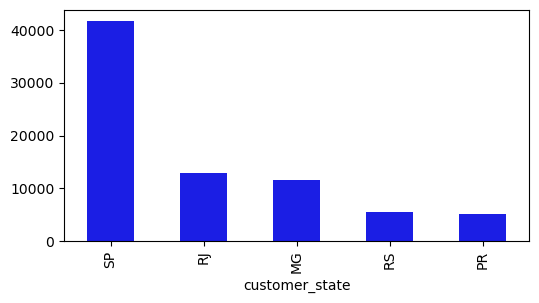

In [11]:
customers_df.info()
customers_df.groupby('customer_state').size().sort_values(ascending=False).head(5).plot(kind='bar', color="#1b1ee4", figsize=(6, 3));
# La majorité des client de OLIST sont de l'ETAT de SP (São Paulo) et RJ (Rio de Janeiro).

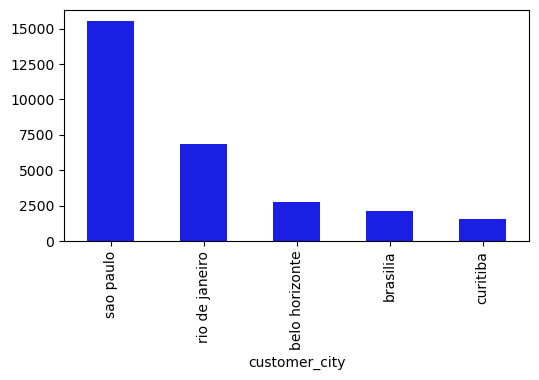

In [12]:
# On peut aussi faire un graphique pour les villes :
customers_df.groupby('customer_city').size().sort_values(ascending=False).head(5).plot(kind='bar', color="#1b1ee4", figsize=(6, 3));

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


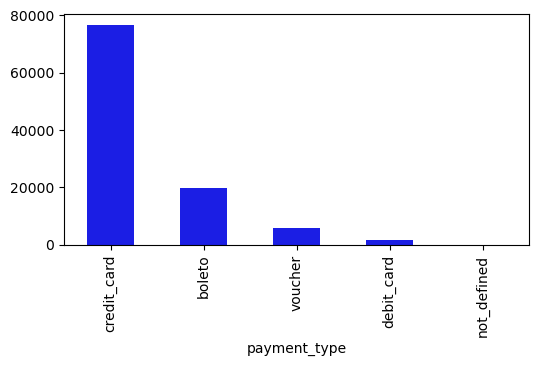

In [13]:
payments_df.info()
payments_df.groupby('payment_type').size().sort_values(ascending=False).plot(kind='bar', color="#1b1ee4", figsize=(6, 3));


<Axes: >

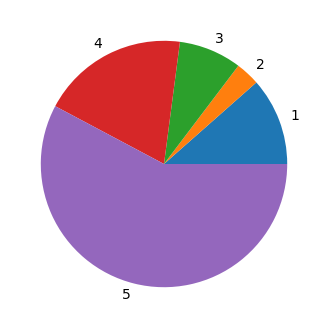

In [14]:
reviews_df.head()
reviews_df.groupby('review_score').size().plot(kind='pie', figsize=(4, 4))

# **3) ANALYSE MICROSOFT PowerBI** 

### **3.1) Exportation des données** 

In [15]:
customers_df.to_csv('customers_df.csv', index=False)
items_df.to_csv('items_df.csv', index=False)
order_df.to_csv('order_df.csv', index=False)
products_df.to_csv('products_df.csv', index=False)
sellers_df.to_csv('sellers_df.csv', index=False)
geolocation_df.to_csv('geolocation_df.csv', index=False)
reviews_df.to_csv('reviews_df.csv', index=False)
payments_df.to_csv('payments_df.csv', index=False)

### **3.2) Modélisation** 

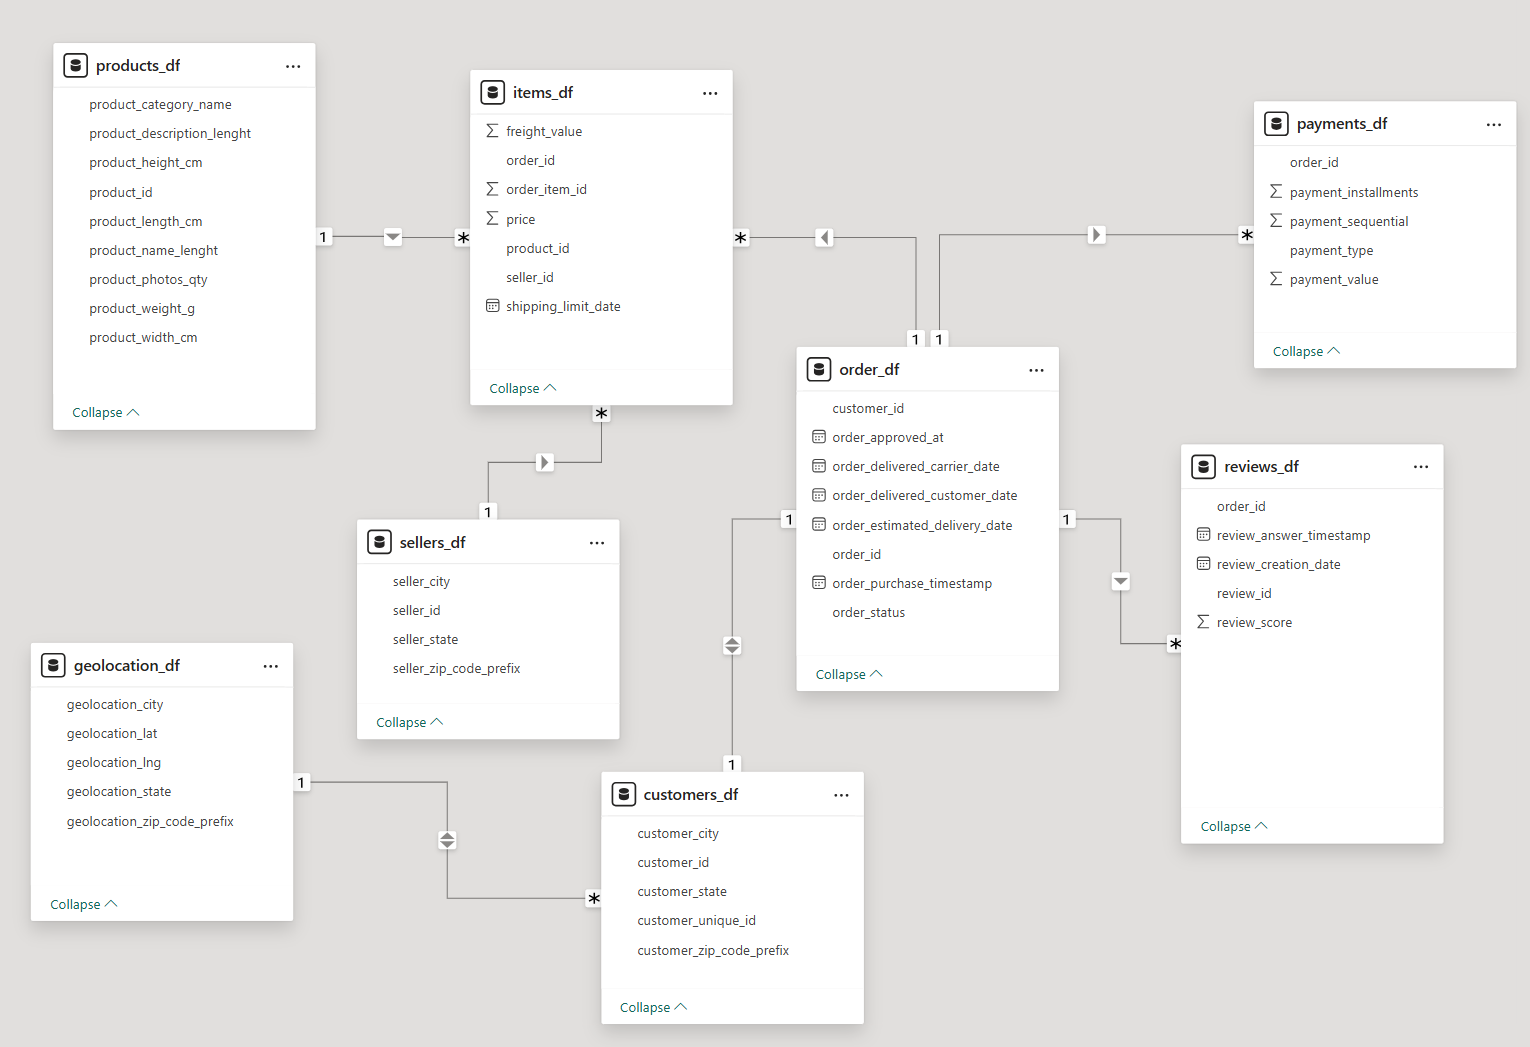

### **3.3) Feature Transformation** 

- Ajouter une colonne sentiment [positif, neutre, négatif] 
- Filtrer les commandes livrée (enlever les commandes annulées)
- On peut créer une colonne 'review_after_delivery' pour filter les reviews fait avant l'arrivée de la commande. 
- Ajouter une colonne dans la table des commandes "order_df" : calcul le temps que prennent les livraisons.  
    La différence (en jours) entre la date estimée de la livraison, et la livraison effective. 
- Ajouter une autre colonne qui interprète la colonnes du temps de livraison avec des tags : en retard, à temps, plus tôt. 

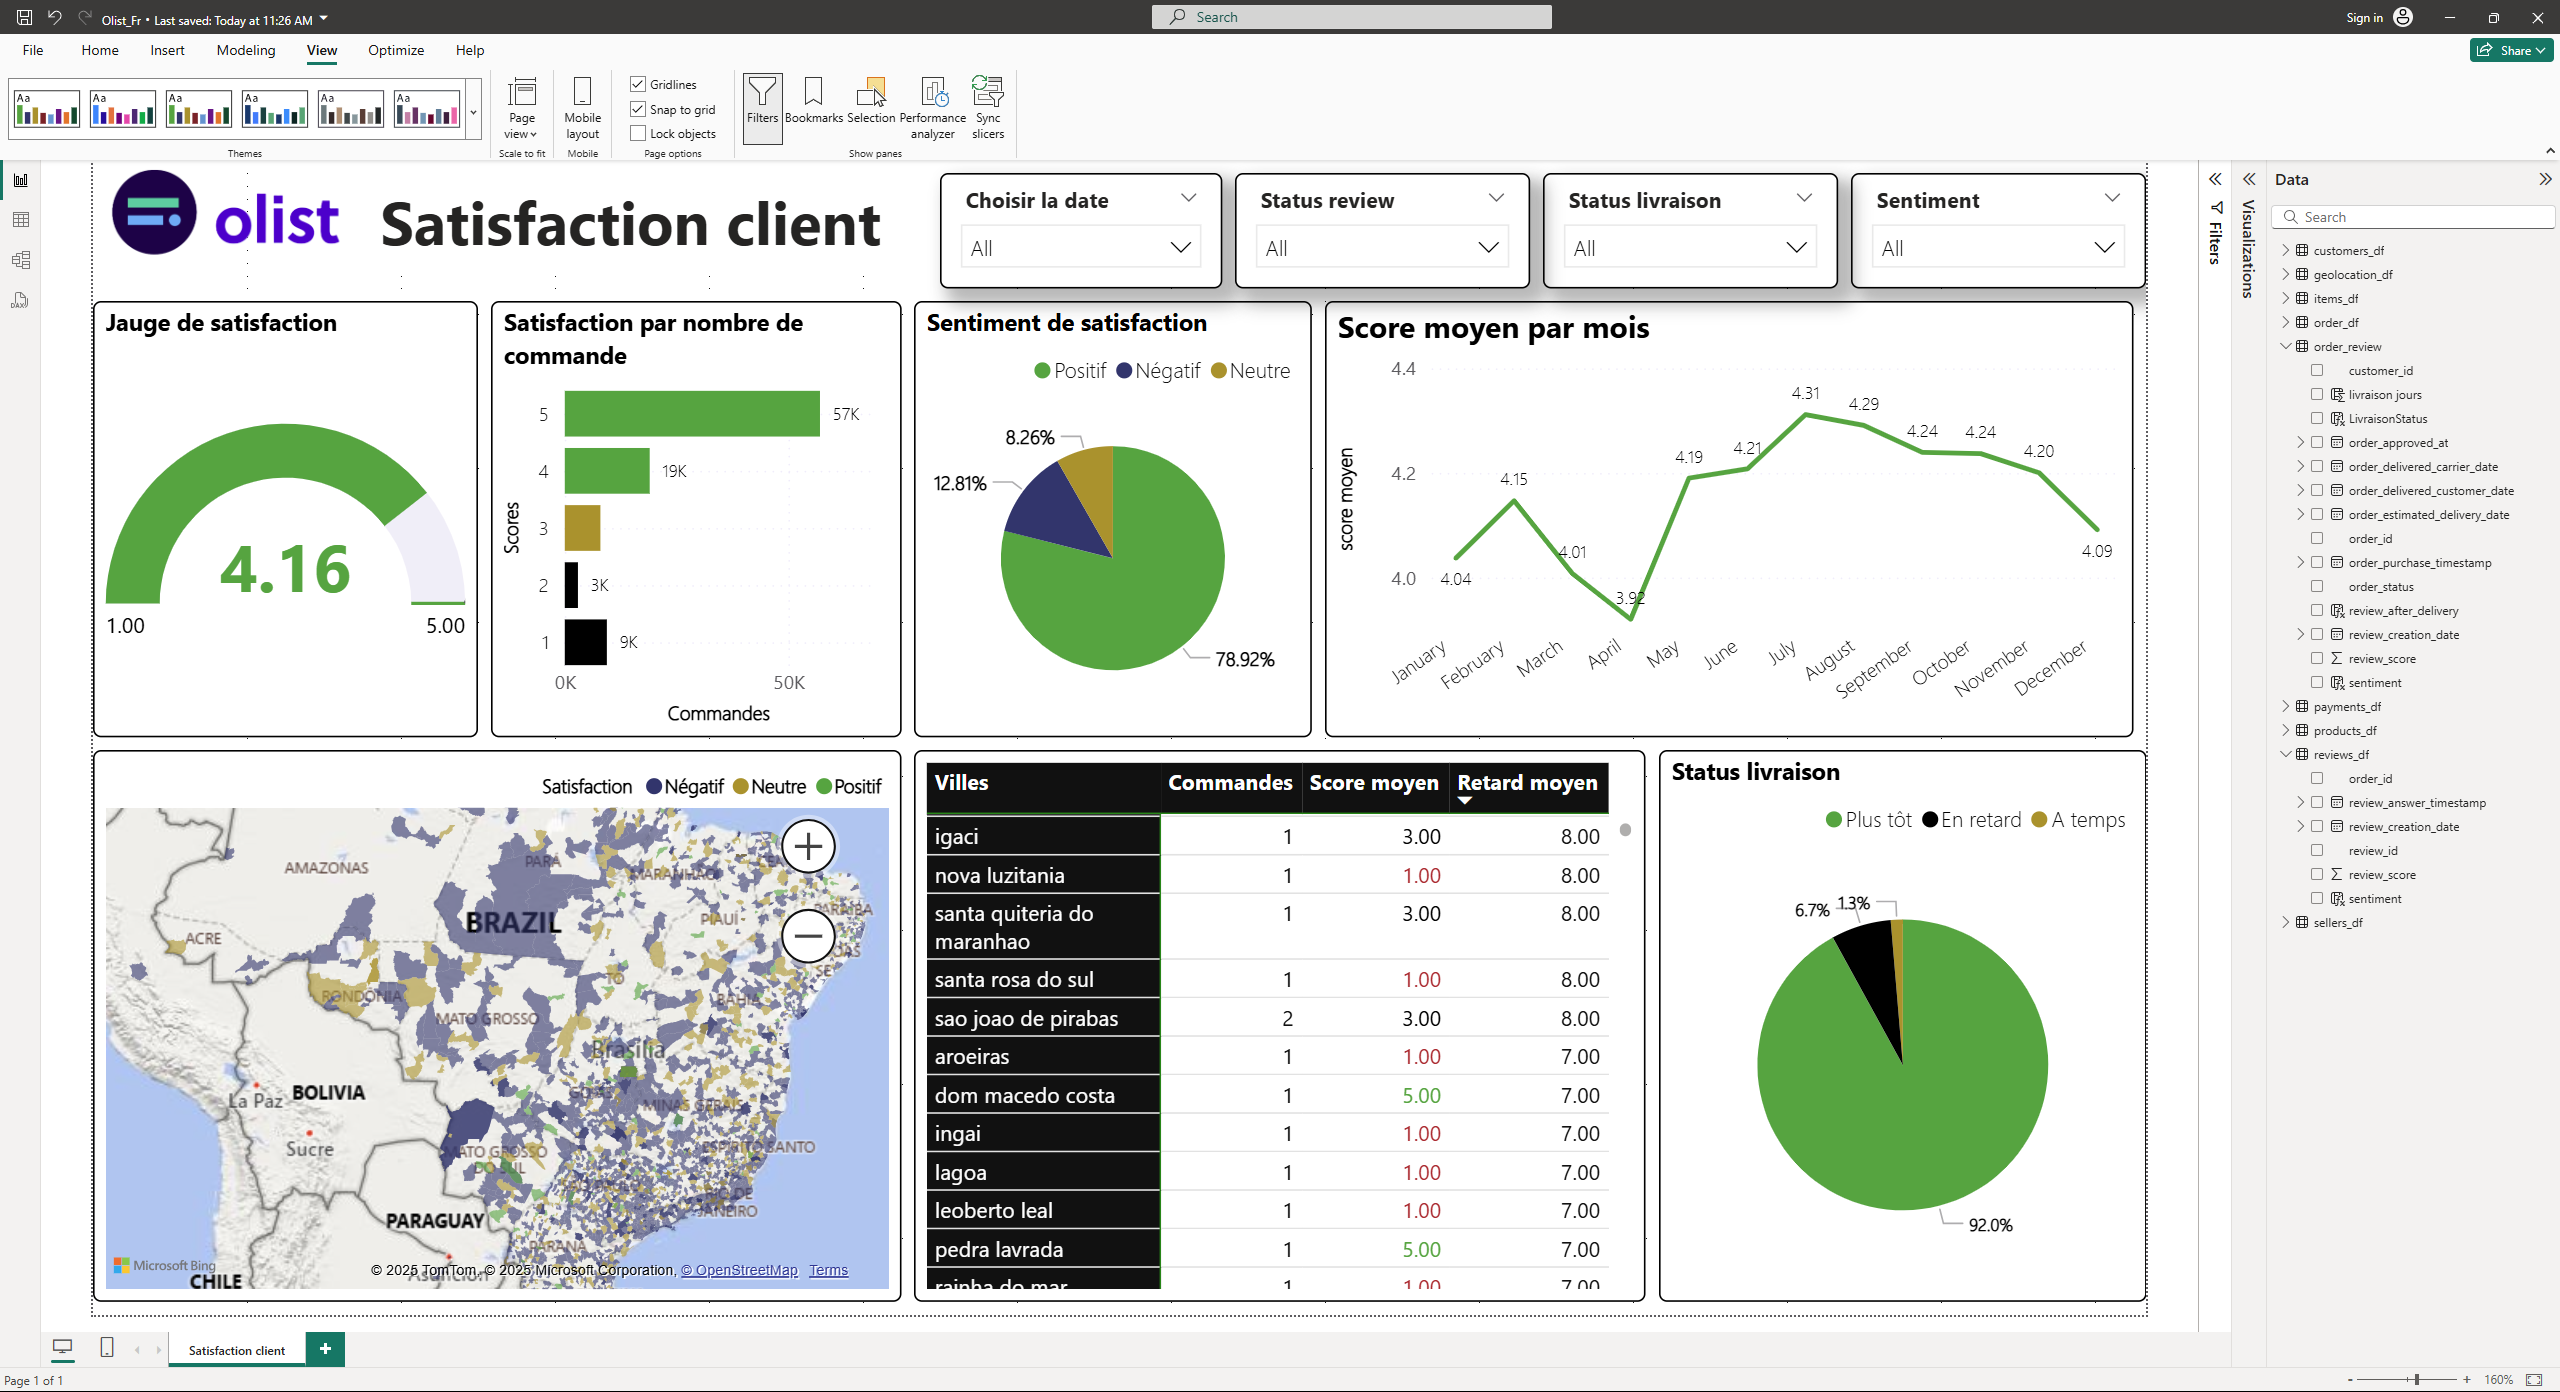

### **3.4) Résultats et Recommandations :** 

1) La satisfaction totale est positive des services de Olist. 4.16 reste un bon score.  
2) Il y a une corrélation entre les retards et le score. 
3) Aucune corrélation n'a pu être établie avec les features de la table produits.  
4) Plus le retard est important, plus les clients laissent un score (négatif 1 et 2) avant l'arrivée de la commande.  
5) Réduire les délais de livraison en creusant les raisons des retards de livraison. Saison particulière, un 'carrier' ou transporteur particulier,  
    des villes particulières. 
6) Mettre en place des alertes (Red flag) pour les commandes proches de la date limite.   
7) Mettre en place des enquêtes pour connaitre les causes des retards ou de l’insatisfaction
8) Renforcer la logistique locale